# Notebook 13: HR Investigating Where Stars are Migrating From

This notebook will be exploring where the stars in our last notebook are migrating from and if there is an age correlation. Our assumption here is that young stars are in very circular orbits, and they either form or interact strongly with the spiral structure!

## Setup 

In [1]:
import astropy

import matplotlib.pyplot as plt
import h5py
import pynbody
from pynbody.analysis import profile
from scipy.optimize import curve_fit

from morgans_sim_setup import *
import numpy as np
import pandas as pd

In [2]:
plt.style.use('bmh')

In [3]:
## Pathway to the simulation galaxy data: 

path_to_h329 = '/work2/09216/mmiller1/stampede2/h329.highres/h329.gsonly.004096'
## We are using 4096 present day timestep and simulation data with only gas and star particles

h329, h329_h, h329_h1 = sim_setup(path_to_h329)

loading sim
doing units
selecting halos
making faceon


In [4]:
## Setting up disk filter 

radius_d = 30
height_d = 2 ## thickness height is centered on the center defined below
center_d = (0,0,0)

## sphere filter and stars
f_sphere = pynbody.filt.Sphere(radius_d, center_d)
h329_s_sphere = h329.s[f_sphere]

pynbody.analysis.angmom.faceon(h329_s_sphere)

## disk filter and stars
f_disk = pynbody.filt.Disc(radius_d, height_d, center_d)
h329_s_disk = h329_s_sphere[f_disk]


In [5]:
## Now setting up vertical profiles using our filters (created in cell above) on h329 galaxy

h329_p_s_vert_sliced = profile.VerticalProfile(h329_s_disk, '5 kpc', '20 kpc', '2 kpc') ## vertical profile 
h329_p_s_sliced = pynbody.analysis.profile.Profile(h329_s_disk, vmin =.01) ## radial profile 

## Setting Up Previous Timestep (TS) 4032 

In [6]:
## Pathway to the simulation galaxy data from 4032 timestep (z=0.1 ish?)

path_to_h329_4032 = '/work2/09216/mmiller1/stampede2/h329.highres/h329.gsonly.004032'
## We are using 4032 

h329_4032, h329_h_4032, h329_h1_4032 = sim_setup(path_to_h329_4032)

loading sim
doing units
selecting halos
making faceon


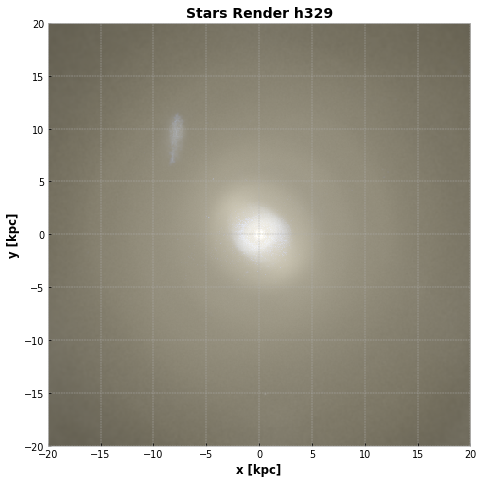

In [15]:
## Plotting an image of the previous timestep's star particles

fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(h329_4032.s, width = '40 kpc', dynamic_range = 8)
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329', fontweight='bold');

## Filtering By Age on h329 4032 TS 

We are trying to see if we can pick out the spiral structuring (from notebook12 where we were plotting progenitor particles) if we go to younger star populations. 

We're going to look at stars less than 7, 5, 3, and 1 Gyrs.

In [7]:
## Setting up age filters

young_7 = pynbody.filt.LowPass('age', '7 Gyr')
young_5 = pynbody.filt.LowPass('age', '5 Gyr')
young_3 = pynbody.filt.LowPass('age', '3 Gyr')
young_1 = pynbody.filt.LowPass('age', '1 Gyr')

In [8]:
## Applying the age filters to the previous timestep's star particles, creating new arrays

h329_4032_s_7 = h329_4032.s[young_7] ## ex: this is all the stars younger than 7 Gyrs in h329 timestep 4032
h329_4032_s_5 = h329_4032.s[young_5]
h329_4032_s_3 = h329_4032.s[young_3]
h329_4032_s_1 = h329_4032.s[young_1]

## Stars Younger than 7 Gyr (in h329 4032 TS)

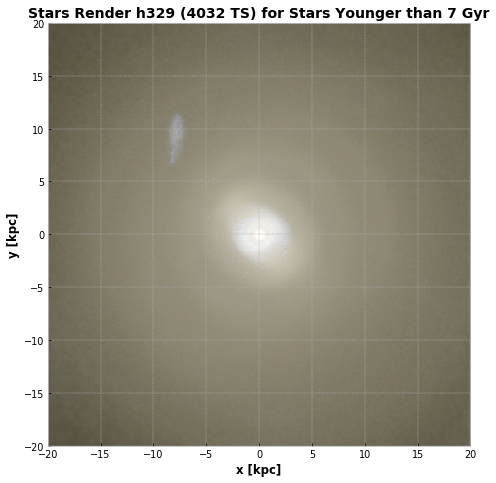

In [9]:
## Stellar render of stars younger than 7 Gyrs in h329 4032

fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(h329_4032_s_7, width = '40 kpc', dynamic_range = 8)
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329 (4032 TS) for Stars Younger than 7 Gyr', fontweight='bold');

## Stars Younger than 5 Gyr (in h329 4032 TS)

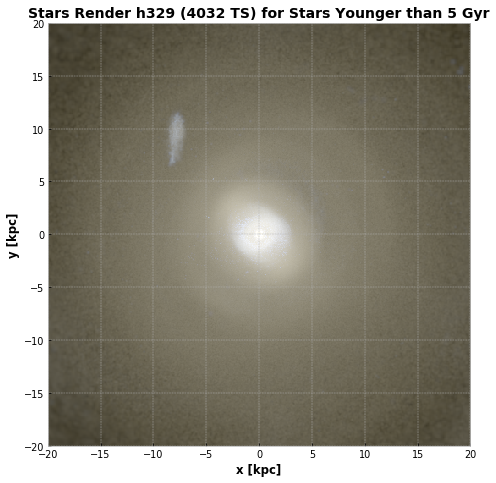

In [10]:
fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(h329_4032_s_5, width = '40 kpc', dynamic_range = 8)
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329 (4032 TS) for Stars Younger than 5 Gyr', fontweight='bold');

## Stars Younger than 3 Gyr (in h329 4032 TS)

/home1/09216/mmiller1/.local/lib/python3.7/site-packages/pynbody/plot/stars.py:72: RuntimeWarning: divide by zero encountered in log10
  return -2.5*np.log10(image*pc2_to_sqarcsec)


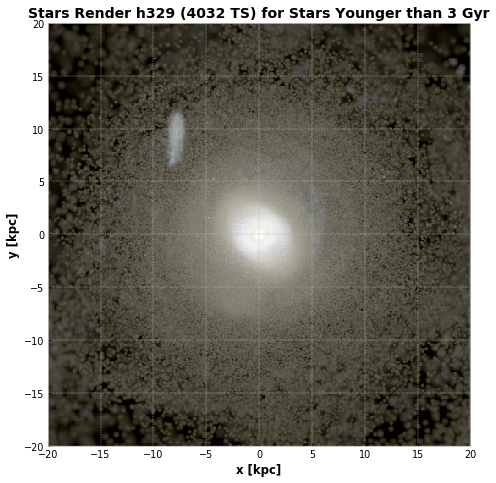

In [11]:
fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(h329_4032_s_3, width = '40 kpc', dynamic_range = 8)
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329 (4032 TS) for Stars Younger than 3 Gyr', fontweight='bold');

## Stars Younger than 1 Gyr (in h329 4032 TS)

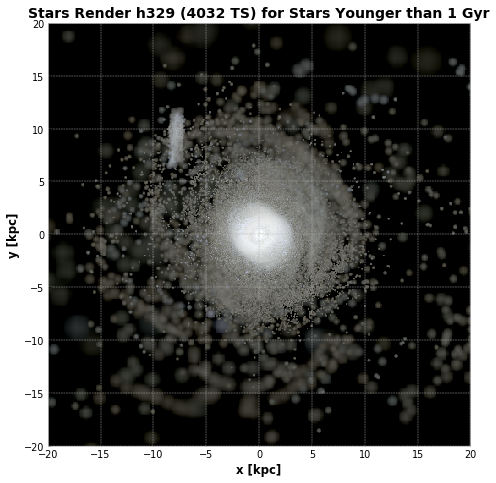

In [12]:
fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(h329_4032_s_1, width = '40 kpc', dynamic_range = 8)
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329 (4032 TS) for Stars Younger than 1 Gyr', fontweight='bold');

## Reflections on Stellar Renders Filtered by Age
 __
 
Based on the filters we've done above it looks to be that there is not apparent spiral structure jumping out when we isolate stellar populations by age in the h329 4032 galaxy. We thought since younger stars will have the more circular orbits, that they would interact with the sprial structure the most and thus the younger the age the more we would see the sprial structuring that we saw in the progenitor particles images from notebooks 10 and 12. 

Since this is not the case, there must be some similarity or property of the stars in the progenitor particles that makes them more interactive with the sprial structure and makes them more likely to migrate with the sprial structure of the galaxy. 

Since we are not seeing that in the age correlation, we should continue investigating other properties of h329 4032 to see if any provide further insight. That's why we wanted to look at the gas density in the plot below and see how the gas is distributed within h329 4032 (reminder h329 4096 = present day h329 galaxy = I will refer to present day h329 as just h329 not h329 4096). 

## Gas Density Plot of h329 4032

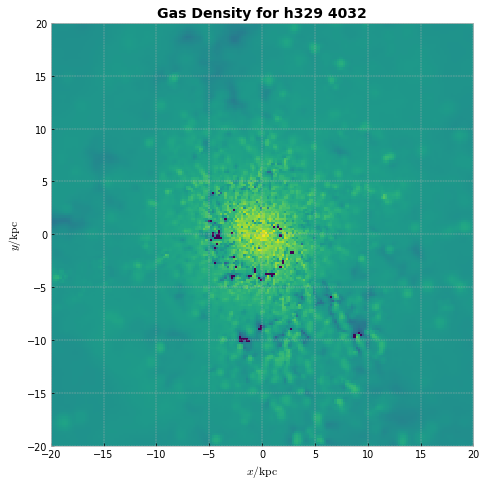

In [21]:
fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.sph.image(h329_h1_4032.g, qty='rho', width=100, cmap='viridis', show_cbar=False, vmin=.01)
plt.title('Gas Density for h329 4032', fontweight = 'bold')
plt.xlim(-20, 20)
plt.ylim(-20, 20);

# End 